<a href="https://colab.research.google.com/github/vaishnokumar/status_deep_learning/blob/main/01_EX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import torch
import matplotlib.pyplot as plt
from torch import nn

In [45]:
torch.__version__

'2.3.0+cu121'

In [46]:
# setup device agnostic code

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Current Device: {device}')

Current Device: cuda


In [54]:
weight = 0.3
bias = 0.9

start = 0
end = 1
step= 0.01

X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

In [55]:
train_split = int(len(X) * 0.8)

X_train = X[:train_split]
y_train = y[:train_split]

X_test = X[train_split:]
y_test = y[train_split:]

len(X_train),len(y_train),len(X_test),len(y_test)


(80, 80, 20, 20)

In [56]:
def plot_pred(train_data = X_train,
              train_label = y_train,
              test_data = X_test,
              test_label = y_test,
              pred = None):
  """
  Plots training data,test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_label, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_label, c="g", s=4, label="Testing data")

  if pred is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, pred, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

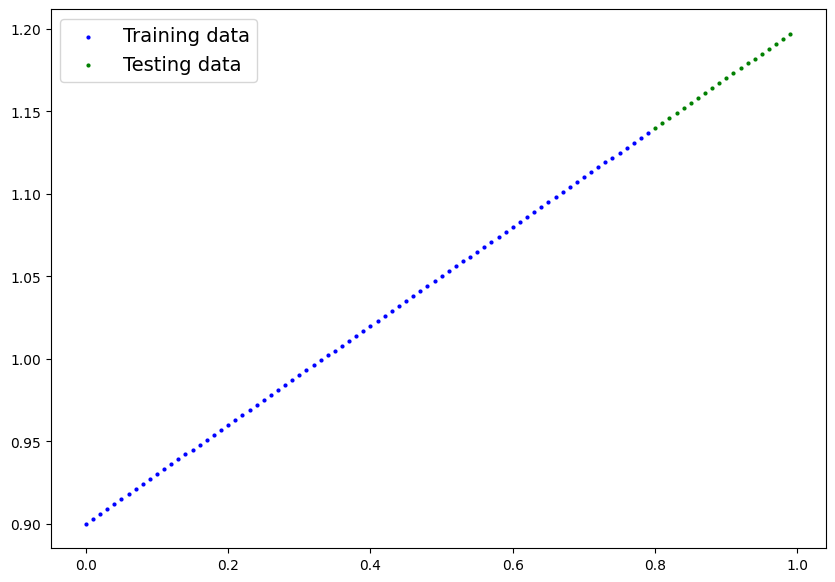

In [57]:
plot_pred()

In [58]:
# build a model

class LinReg(nn.Module):

  def __init__(self):

    super().__init__()

    self.weight = nn.Parameter(torch.randn(1, requires_grad= True, dtype = float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad= True, dtype = float))

  def forward(self, x: torch.Tensor):
    return self.weight * x + self.bias

In [52]:
#option 2 for model building

# class LinReg2(nn.Module):

#   def __init__(self):

#     super().__init__()

#     self.linear_layer = nn.Linear(in_features = 1,
#                                   out_features= 1)

#   def forward(self, x: torch.Tensor):
#     return self.weight * x + self.bias

In [59]:
torch.manual_seed(42)
model_1 = LinReg()
model_1,model_1.state_dict()

(LinReg(),
 OrderedDict([('weight', tensor([0.3367], dtype=torch.float64)),
              ('bias', tensor([0.1288], dtype=torch.float64))]))

In [60]:
next(model_1.parameters()).device

device(type='cpu')

In [61]:
model_1.to(device)
list(model_1.parameters())

[Parameter containing:
 tensor([0.3367], device='cuda:0', dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([0.1288], device='cuda:0', dtype=torch.float64, requires_grad=True)]

In [63]:
# create a loss function and set the optimizer

loss_fn = nn.L1Loss()

optim = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.01)

In [64]:
#training Loop

torch.manual_seed(42)

# Send data to target device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)


epochs = 300

for epoch in range(epochs):
  model_1.train()
  y_pred = model_1(X_train)
  loss = loss_fn(y_pred, y_train)
  optim.zero_grad()
  loss.backward()
  optim.step()

  if epoch % 20 == 0:
    model_1.eval()
    with torch.inference_mode():
      y_preds = model_1(X_test)
      test_loss = loss_fn(y_preds, y_test)
      print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")


Epoch: 0 | Train loss: 0.757 | Test loss: 0.725
Epoch: 20 | Train loss: 0.525 | Test loss: 0.454
Epoch: 40 | Train loss: 0.294 | Test loss: 0.183
Epoch: 60 | Train loss: 0.077 | Test loss: 0.073
Epoch: 80 | Train loss: 0.053 | Test loss: 0.116
Epoch: 100 | Train loss: 0.046 | Test loss: 0.105
Epoch: 120 | Train loss: 0.039 | Test loss: 0.089
Epoch: 140 | Train loss: 0.032 | Test loss: 0.074
Epoch: 160 | Train loss: 0.025 | Test loss: 0.058
Epoch: 180 | Train loss: 0.018 | Test loss: 0.042
Epoch: 200 | Train loss: 0.011 | Test loss: 0.026
Epoch: 220 | Train loss: 0.004 | Test loss: 0.009
Epoch: 240 | Train loss: 0.004 | Test loss: 0.006
Epoch: 260 | Train loss: 0.004 | Test loss: 0.006
Epoch: 280 | Train loss: 0.004 | Test loss: 0.006


In [65]:
model_1.state_dict()

OrderedDict([('weight',
              tensor([0.3067], device='cuda:0', dtype=torch.float64)),
             ('bias', tensor([0.9011], device='cuda:0', dtype=torch.float64))])

In [67]:
# make prediction

model_1.eval()

with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[1.1464],
        [1.1495],
        [1.1525],
        [1.1556],
        [1.1587],
        [1.1617],
        [1.1648],
        [1.1679],
        [1.1709],
        [1.1740],
        [1.1771],
        [1.1801],
        [1.1832],
        [1.1863],
        [1.1893],
        [1.1924],
        [1.1955],
        [1.1985],
        [1.2016],
        [1.2047]], device='cuda:0', dtype=torch.float64)

In [68]:
y_preds.cpu()

tensor([[1.1464],
        [1.1495],
        [1.1525],
        [1.1556],
        [1.1587],
        [1.1617],
        [1.1648],
        [1.1679],
        [1.1709],
        [1.1740],
        [1.1771],
        [1.1801],
        [1.1832],
        [1.1863],
        [1.1893],
        [1.1924],
        [1.1955],
        [1.1985],
        [1.2016],
        [1.2047]], dtype=torch.float64)

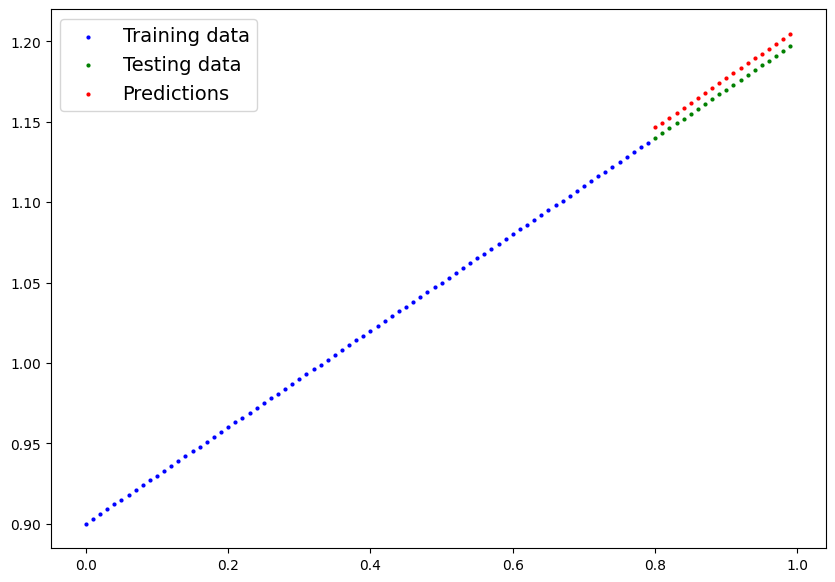

In [69]:
plot_pred(pred = y_preds.cpu())

In [70]:
# saving the model

from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True,exist_ok = True)
# 2. Create model save path
MODEL_NAME = "01_pytorch_model"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
# 3. Save the model state dict
print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj = model_1.state_dict(),f = MODEL_SAVE_PATH)

Saving model to models/01_pytorch_model


In [71]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
loaded_model = LinReg()
loaded_model.load_state_dict(torch.load(f = MODEL_SAVE_PATH))
loaded_model.to(device)

LinReg()

In [72]:
# Make predictions with loaded model and compare them to the previous
y_preds_new = loaded_model(X_test)
y_preds == y_preds_new

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

In [73]:
loaded_model.state_dict()


OrderedDict([('weight',
              tensor([0.3067], device='cuda:0', dtype=torch.float64)),
             ('bias', tensor([0.9011], device='cuda:0', dtype=torch.float64))])